In [1]:
from pylab import *

%run ~/pizza/src/pizza.py

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
gl tool did not load:
  No module named OpenGL.Tk
image tool did not load:
  No module named Pmw
animate tool did not load:
  No module named ImageTk


In [2]:
data = dump("dump.lammpstrj")

5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18500 18600 18700 18800 18900 19000 19100 19200 19300 19400 19500 19600 19700 19800 19900 20000 20100 20200 20300 20400 20500 20600 20700 20800 20900 21000 21100 21200 21300 21400 21500 21600 21700 21800 21900 22000 22100 22200 22300 22400 

In [3]:
r_center = array([16.8, 16.8])
t = data.time(); nt = size(t); tmp_time, box, atoms, bonds, tris, lines = data.viz(0)

In [4]:
import seaborn
seaborn.set()

In [5]:
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 16

In [6]:
x = array(data.vecs(t[-1], "x"))
y = array(data.vecs(t[-1], "y"))
z = array(data.vecs(t[-1], "z"))

vx = array(data.vecs(t[-1], "vx"))
vy = array(data.vecs(t[-1], "vy"))
vz = array(data.vecs(t[-1], "vz"))

v_g = array(data.vecs(t[-1], "v_g")).astype(bool)

y_g = y[v_g]
z_g = z[v_g]

vx_g = vx[v_g]
vy_g = vy[v_g]
vz_g = vz[v_g]

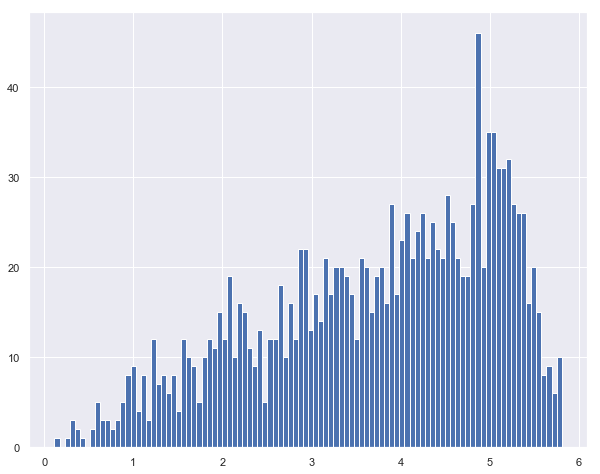

In [7]:
positions = r_center - array(zip(y_g, z_g))
velocities = array(zip(vx_g, vy_g, vz_g))

speed = sqrt(velocities[:, 0]**2 + velocities[:, 1]**2 + velocities[:, 2]**2)
r = sqrt(positions[:, 0]**2 + positions[:, 1]**2)

argpos = argsort(r)
hist(r, bins=100)
show()

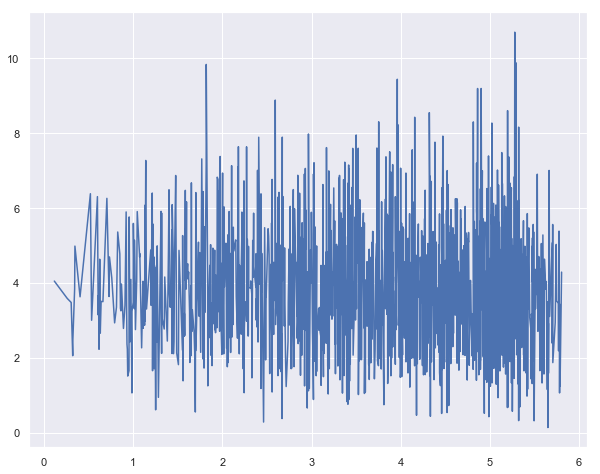

In [8]:
plot(r[argpos], speed[argpos])

In [89]:
nbins = 100

bin_r = linspace(0, 5.87, nbins)
avg_vx = zeros(nbins)
step_count = zeros(nbins)

_, R = histogram(bin_r, bins=nbins-1)
particle_idx = arange(count_nonzero(v_g))

for ti in t:
    v_g = array(data.vecs(ti, "v_g")).astype(bool)
    y = array(data.vecs(ti, "y"))
    z = array(data.vecs(ti, "z"))
    vx = array(data.vecs(ti, "vx"))

    y_g = y[v_g]
    z_g = z[v_g]
    vx_g = vx[v_g]

    positions = r_center -  column_stack((y_g, z_g))
    r = sqrt(positions[:, 0]**2 + positions[:, 1]**2)
    
    bin_idx = digitize(r, R) - 1
    avg_vx[bin_idx[particle_idx]] += vx_g[particle_idx]
    step_count[bin_idx[particle_idx]] += 1
    
avg_vx = np.divide(avg_vx, step_count, out=np.zeros_like(avg_vx), where=step_count!=0)

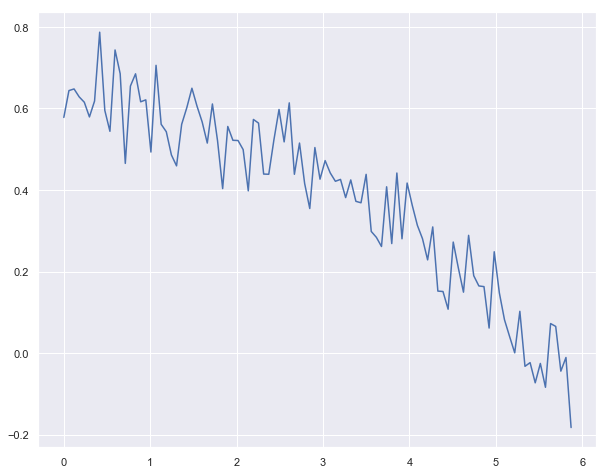

In [90]:
plot(bin_r, avg_vx)
show()